## 컴퓨터 비전 분야의 백본 네트워크
- AlexNet,VGG,ResNet 등
- DenseNet,SENet
- NAS,EfficientNet

## 논문의 형식적 구조
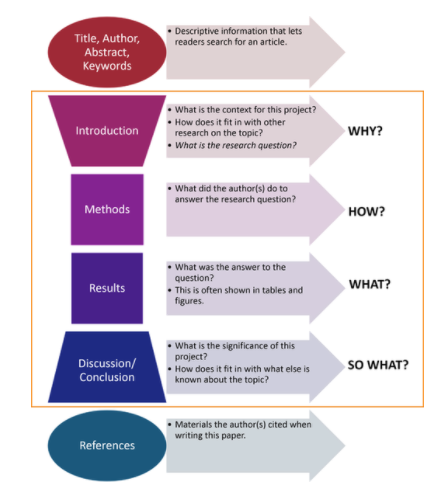

### 일반적인 논문의 구조
- 초록(abstract) : 아이디어를 제안하는 방식과 학계에 이 논문이 기여하는 점을 요약
- 서론(introduction) 과 관련 연구(related work) : 논문의 주요 내용.
- 이론 설명 : 소제목의 표현방식에 따라 달라지지만 일반적으로 제안하는 방법
- 실험(experiments) 셋팅과 결과 : 제안하는 방법을 소개한 후 이 효과를 확인
- 결론(conclusion) : 연구 내용 요약과 추가적인 연구방향을 소개
- 참고문헌(reference) 와 부록(appendix)

### 논문의 형식 속에 담고자 하는 논리 구조
1. 이전까지의 연구가 해결하지 못했던 문제의식
2. 이 문제를 해결하기 위한 그동안의 다른 시도들
3. 이 문제에 대한 이 논문만의 독창적인 시도
4. 그러한 시도가 가져온 차별화된 성과

### ResNet의 논문인 Deep Residual Learning for Image Recognition에서 나타나는 4단계 논리 구조
https://arxiv.org/pdf/1512.03385.pdf
- Abstract와 1.Introduction에서 문제의식과 이를 해결하는 솔루션의 전체적 개요를 요약해서 제시한 후
- 2.Related Work에서는 본 논문의 솔루션과 유사한 다른 시도들을 언급
- 3.Deep Residual Learning에는 제안 방법의 구체적인 내용과 구현 방법을 소개하고
- 4.Experiments에서 비교실험 구조와 다양한 데이터셋에서의 실험결과를 통해 이를 검증합니다
- 끝으로 References와 Appendix가 뒤를 잇습니다.

## ResNet의 핵심개념과 그 효과

https://arxiv.org/pdf/1512.03385.pdf

1. ResNet 논문의 문제의식(서론)
- 딥러닝 모델의 레이어를 깊이 쌓으면 항상 성능이 좋아지는가??
- 레이어를 깊이 쌓았을 때 Vanishing/Exploding Gradient 문제가 발생하여 모델의 수렴을 방해하는 문제가 생긴다.
- normalized initialization, intermediate normalization layers 방법이 위의 문제점 해결책으로 쓰인다.
- Degradation Problem이란 딥러닝 모델의 레이어가 깊어졌을 때 모델이 수렴했음에도 불구하고 오히려 레이어 개수가 적을 때보다 모델의 training/test error가 더 커지는 현상이 발생하는데, 이것은 오버피팅 때문이 아니라 네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문에 발생하는 문제이다.

2. ResNet 논문이 제시한 솔루션 : Residual Block
- ResNet은 깊은 네트워크의 학습이 어려운 점을 해결하기 위해서 레이어의 입력값을 활용하여 레이어가 "residual function"(잔차 함수)을 학습하도록 합니다.
- 일종의 지름길("shortcut connection")을 통해서 레이어가 입력값을 직접 참조하도록 레이어를 변경했다고 보면 된다.
- Shortcut connection은 앞에서 입력으로 들어온 값을 네트워크의 출력층에 곧바로 더해준다.
- 네트워크는 출력값에서 원본 입력을 제외한 잔차(residual) 함수를 학습하기 때문에 네트워크가 ResNet이라는 이름을 가지게 되었다.
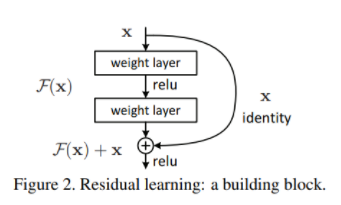
- 학습해야 할 레이어 H(x) 를 F(x)+x 로 만들면 F(x)가 Vanishing Gradient현상으로 전혀 학습이 안되어 zero mapping이 될지라도, 최종 H(x)는 최소한 identity mapping이라도 될 테니 성능 저하는 발생하지 않게 된다.
- 실제로 학습해야 할 F(x)F(x)는 학습해야 할 레이어 H(x)에다 입력값 x를 뺀 형태, 즉 잔차(Residual)함수가 되는데, 이것은 H(x)를 직접 학습하는 것보다는 훨씬 학습이 쉽고 안정적으로 학습이 되며, 레이어를 깊이 쌓을수록 성능이 향상되는 것이 확인되었다. 
- 이후 residual 레이어는 F(x) + x가 되며 이 값은 ReLU 활성함수를 거치게 된다.
- ResNet에서는 shortcut connection을 가진 ResNet의 기본 블록을 Residual Block이라고 부른다. ResNet은 이런 Residual Block 여러 개로 이루어져있다.

3. Experiments
- ResNet에 추가된 shortcut connection의 아이디어를 검증하기 위해 short connection이 없는 네트워크와 이를 사용한 네트워크를 가지고 성능을 비교해본다.
- 실제 논문에서는 네트워크가 깊어짐에 따라 발생하는 경사소실(vanishing gradient) 문제를 ResNet이 해결함을 보여주기 위해서, shortcut connection의 유무와 네트워크 깊이에 따라 경우를 나누어 모델을 구현합니다.
- 18개 층과 34개 층을 갖는 네트워크를, 각각 shortcut이 없는 일반 네트워크(plain network)와 shortcut이 있는 ResNet 두 가지로 구현해 총 4가지를 만든 것이지요. 이후 이미지넷(ImageNet) 데이터를 사용해 각 모델을 훈련을 시킨 뒤 효과를 분석한다.
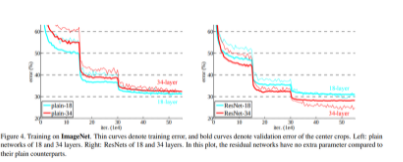
- 위 그림에서 왼쪽은 일반 네트워크 두 개로 네트워크가 깊어지더라도 학습이 잘 되지 않는 것을 볼 수 있다. 34개 층을 갖는 네트워크가 18개 층을 갖는 네트워크보다 오류율(error rate)이 높다.
- shortcut이 적용된 오른쪽에서는 레이어가 깊어져도 학습이 잘 되는 효과를 볼 수 있다.
-  그렇다면 이렇게 학습된 모델은 검증 데이터셋(vallidation dataset)에서 어떻게 차이가 날까요?
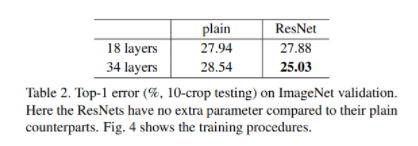
- Top-1 error란 모델이 가장 높은 확률 값으로 예측한 class 1개가 정답과 일치하는지 보는 경우의 오류율이다. Top-5는 모델이 예측한 값들 중 가장 높은 확률 값부터 순서대로 5개 class 중 정답이 있는지를 확인하는 것이다. 이 숫자는 당연히 낮을수록 좋다.
- 일반 네트워크("plain")는 레이어가 16개나 늘어나 네트워크가 깊어졌는데도 오류율은 오히려 높아졌다. 경사소실로 인해 훈련이 잘되지 않았기 때문이다. ResNet에서는 잘 훈련된 레이어가 16개가 늘어난 효과로 오류율이 2.85% 감소했다. 논문에서는 이렇게 간단한 실험으로 Residual Block의 효과를 입증하고 있다.
- 어떤 태스크(task)의 모델 간 성능을 비교할 때 널리 사용되어 기준이 되는 데이터셋을 벤치마크 데이터셋이라고 합니다. 이를 통해서 최첨단 성능, 즉 State of the art(SOTA)을 기록하는 모델을 가리기도 한다. 논문의 실험에서 ResNet 앙상블의 분류(classification) 태스크 Top-5 error 는 3.57을 기록했다.

## DenseNet
https://arxiv.org/pdf/1608.06993.pdf

https://hoya012.github.io/blog/DenseNet-Tutorial-1/

ResNet의 shortcut connection을 마치 Fully Connected Layer처럼 촘촘히 가지도록 한다면 더욱 성능 개선 효과가 클 것이라고 생각하고 이를 실험으로 입증했다.
1. Dense Connectivity
- DenseNet의 기본 블록은 LL 개의 레이어가 있을 때 레이어 간 L(L+1)/2L(L+1)/2 개의 직접적인 연결(direct connection)을 만든다. 이러한 연결 구조를 "dense connectivity" 라고 부른다.
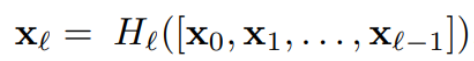
- 각 레이어는 이전 레이어들에서 나온 특성 맵(feature map) 전부를 입력값으로 받는다. 
- 위 식에서 (X_0, X_1, ... X_{l-1})은 0번째 레이어를 거친 특성 맵부터 (l-1)번째 레이어를 거친 특성 맵까지를 의미하며, 이들은 합성함수 H를 거쳐 l 번째 레이어의 출력값이 됩니다. DenseNet은 이를 통해서 경사 소실 문제(gradient vanishing)를 개선하고 특성을 계속 재사용할 수 있도록 한다.
- DenseNet은 하나하나를 차원으로 쌓아서(concatenate) 하나의 텐서로 만들어 낸다.
- 합성함수 H_l 은 이 텐서에 대해 배치 정규화(batch normalization, BN), ReLU 활성화 함수, 그리고 3x3 컨볼루션 레이어를 통해서 pre-activation을 수행한다.

2. Growth Rate
- 특성 맵을 더해주던 ResNet과 달리 DenseNet에서는 특성 맵을 채널 방향으로 쌓아서 사용한다.
- 4개의 채널을 가진 CNN 레이어 4개를 DenseNet 블록으로 만들었을 때, 입력값의 채널 개수가 4인 경우 각 레이어의 입력값은 아래와 같다.
```
1) 첫 번째 레이어-4
2) 두 번째 레이어-4+4=8
3) 세 번째 레이어-4+4+4=12
4) 네 번째 레이어-4+4+4+4=16
```
- 입력값의 채널이 4로 시작했으나 진행할수록 특성 맵의 크기가 매우 커지는 것을 볼 수 있다. 이를 제한하기 위해서 논문에서는 growth rate이라는 값을 조정하여 레이어를 거치면서 증가하게 되는 채널의 개수를 조절한다.

In [1]:
# Dense Block내의 각 레이어 output의 channel을 계산하는 함수
# growth rate=32
#  입력값으로 사용되는 이미지넷 데이터에는 3개의 채널이 있고, 이러한 Dense Block 내에 12개의 컨볼루션 레이어가 있을 때 각 레이어에서 입력받는 채널은 몇 개가 될까요? 
def get_channel_list():
    channel_list = []
    input_channel = 32
    growth_rate = 32
    for i in range(12):
        channel_list.append(input_channel + growth_rate*i)
    return channel_list

get_channel_list()

# 결과가 [32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384] 이 나오면 정상적으로 구현된 것입니다.

[32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384]

## SENet
https://arxiv.org/pdf/1709.01507.pdf

https://jayhey.github.io/deep%20learning/2018/07/18/SENet/

1. Sequeeze
- 특성 맵의 채널에서 어느 채널이 중요한지 정보를 만들기 위해서는 우선 채널에 따른 정보를 압축해서 가져온다->풀링기법 사용

2. Excitate
- 채널별 정보에 따라 어떤 채널을 강조해야 할지 판단한다.
- 시그모이드 활성화함수를 사용한다->가장 중요한 하나의 채널만 활성화되는 것이 아닌, 여러 채널들이 서로 다른 정도로 활성화되도록 하기 위함이다.
- 계산된 벡터를 기존의 특성 맵에 채널에 따라서 곱해주어 중요한 채널이 활성화 되도록 만들어준다.

## NAS(Neural Architecture Search)
https://arxiv.org/pdf/1707.07012.pdf

http://solarisailab.com/archives/2691
1. NASNet
- NASNet은 NAS에 강화학습을 적용하여 500개의 GPU로 최적화한 CNN 모델이다.
- 여러 가지 네트워크 구조를 탐색하는 것을 아키텍쳐 탐색(architecture search)라고 한다.
- 그중 신경망을 사용해 모델의 구조를 탐색하는 접근 방법을 NAS(neural architecture search) 라고 한다.
- NASNet과 같이 거창한 방법이 아니더라도, 일반적으로 머신 러닝에서는 그리드 탐색(grid search) 등으로 실험과 모델 셋팅(config)를 비교하기 위한 자동화된 방법을 사용하곤 한다.
- 그리드 탐색은 간단히 말하면 모든 조합을 실험해보는 것이다. 그러나 그리드 탐색과 같은 방법으로 접근할 경우 모델에서 바꿔볼 수 있는 구성의 종류가 매우 많아 머신 러닝 중에서도 학습이 오래 걸리는 딥러닝에서는 적합하지 않다.
- 아키텍쳐 탐색을 하는 동안 강화학습 모델은 대상 신경망의 구성을 일종의 변수로 조정하면서 최적의 성능을 내도록 한다. 우리가 지금까지 보아왔던 레이어의 세부 구성, CNN의 필터 크기, 채널의 개수, connection 등이 조정할 수 있는 변수가 된다.
- 이렇게 네트워크 구성에 대한 요소들을 조합할 수 있는 범위를 탐색 공간(search space)이라고 한다.


2. Convolution cell
- 레이어 하나마다의 하이퍼 파라미터를 조절한다면 최적의 포인트를 찾는 데 시간이 오래걸리기 때문에 탐색공간을 줄이기 위해서 모듈(cell) 단위의 최적화를 하고 그 모듈을 조합하는 방식을 채택한다.
- ResNet에는 Residual Block, DenseNet에는 Dense Block이라는 모듈이 사용되는데, 논문에서는 이와 유사한 개념을 convolution cell이라고 부른다.
- Convolution cell은 normal cell과 reduction cell로 구분된다. Normal cell은 특성 맵의 가로, 세로가 유지되도록 stride를 1로 고정합니다. Reduction cell은 stride를 1 또는 2로 가져가서 특성 맵의 크기가 줄어들 수 있도록 한다.

## EfficientNet
- 기존 모델들의 오류율을 뛰어넘을 뿐만 아니라 모델의 크기인 "Number of Parameters" 또한 최적화된 것을 볼 수 있다.
- 정확도를 얻는 데 다른 네트워크들은 무지막지한 파라미터의 수를 사용한 반면 EfficientNet은 작고 효율적인 네트워크를 사용했다고 볼 수 있다.
- EfficientNet은 우리가 이미지에 주로 사용하는 CNN을 효율적으로 사용할 수 있도록 네트워크의 형태를 조정할 수 있는 width, depth, resolution 세 가지 요소에 집중한다.
- 여기서 width는 CNN의 채널에 해당합니다. 채널을 늘려줄수록 CNN의 파라미터와 특성을 표현하는 차원의 크기를 키울 수 있다.
- depth는 네트워크의 깊이입니다. ResNet은 대표적으로 네트워크를 더 깊게 만들 수 있도록 설계해 성능을 올린다.
- resolution은 입력값의 너비(w)와 높이(h) 크기이다. 입력이 클수록 정보가 많아져 성능이 올라갈 여지가 생기지만 레이어 사이의 특성 맵이 커지는 단점이 있다.

### Compound scaling
- EfficientNet은 앞서 말한 resolution, depth, width를 최적으로 조정하기 위해서 앞선 NAS와 유사한 방법을 사용해 기본 모델(baseline network)의 구조를 미리 찾고 고정한다.
- 모델의 구조가 고정이 되면 효율적인 모델을 찾는다는 커다란 문제가, 개별 레이어의 resolution, depth, width 를 조절해 기본 모델을 적절히 확장시키는 문제로 단순화된다.
- EfficientNet 논문에서는 resolution, depth, width라는 세 가지 "scaling factor"를 동시에 고려하는 compound scaling을 제안한다.